In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [4]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin")
)

In [5]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2020-06-22,Sacramento,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
2018-09-03,Nevada,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
2017-06-05,Stanislaus,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
2020-01-20,Tehama,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
2017-11-13,Stanislaus,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [6]:
sd_dual = (
    ca_housing
    .loc[ca_housing["region_name"] == "San Diego",
        ["inventory", "median_active_list_price"]]
).sort_index()

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


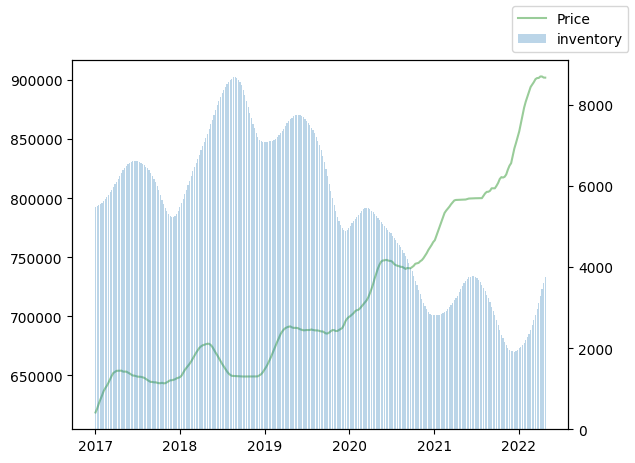

In [7]:
fig, ax = plt.subplots()

width = 5

ax.plot(
    sd_dual["median_active_list_price"],
    color="green",
    alpha=.4,
    label="Price"
)
# ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual.index, 
        sd_dual["inventory"], 
        width=width,
        alpha=.3,
        label="inventory"   
       )

# ax2.legend()

fig.legend()

In [9]:
sd_dual2 = sd_dual.resample("Y").mean()

sd_dual2

/var/folders/bm/h1t1wfk16y5gv2b9svjm7mzw0000gn/T/ipykernel_1737/2108416439.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sd_dual2 = sd_dual.resample("Y").mean()


,inventory,median_active_list_price
period_begin,,
2017-12-31,5986.730769,645314.217308
2018-12-31,7438.433962,658434.637736
2019-12-31,6794.538462,685614.486538
2020-12-31,4494.076923,735517.426923
2021-12-31,2975.961538,803811.036538
2022-12-31,2692.470588,889710.241176


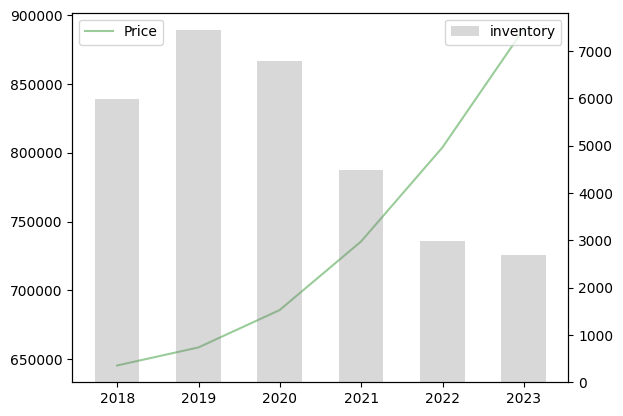

In [12]:
fig, ax = plt.subplots()

width = 200

ax.plot(
    sd_dual2["median_active_list_price"],
    color="green",
    alpha=.4,
    label="Price"
)
ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual2.index, 
        sd_dual2["inventory"], 
        width=width,
        color="grey",
        alpha=.3,
        label="inventory"   
       )

ax2.legend()

# fig.legend(bbox_to_anchor=(1.2, .8))

# plt.show()